In [49]:
# importing the dependencies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [50]:
# fetching dataset - 1

df1 = pd.read_csv('ev_charger_dataset.csv')
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [51]:
# fetching dataset - 2

df2 = pd.read_csv('ev-charging-stations-india.csv')
df2.head()

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [52]:
# fetching dataset - 3

import pandas as pd

# Correct way to load a CSV file
df2 = pd.read_csv('ev-charging-stations-india.csv')
df2.head()


,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [88]:
import pandas as pd

df3 = pd.read_csv('ev_complete_dataset.csv')  # Change the filename as needed
print(df3.columns)


Index(['Brand', 'Model', 'Battery Capacity (kWh)', 'Range (km)', 'AccelSec',
       'TopSpeed_KmH'],
      dtype='object')


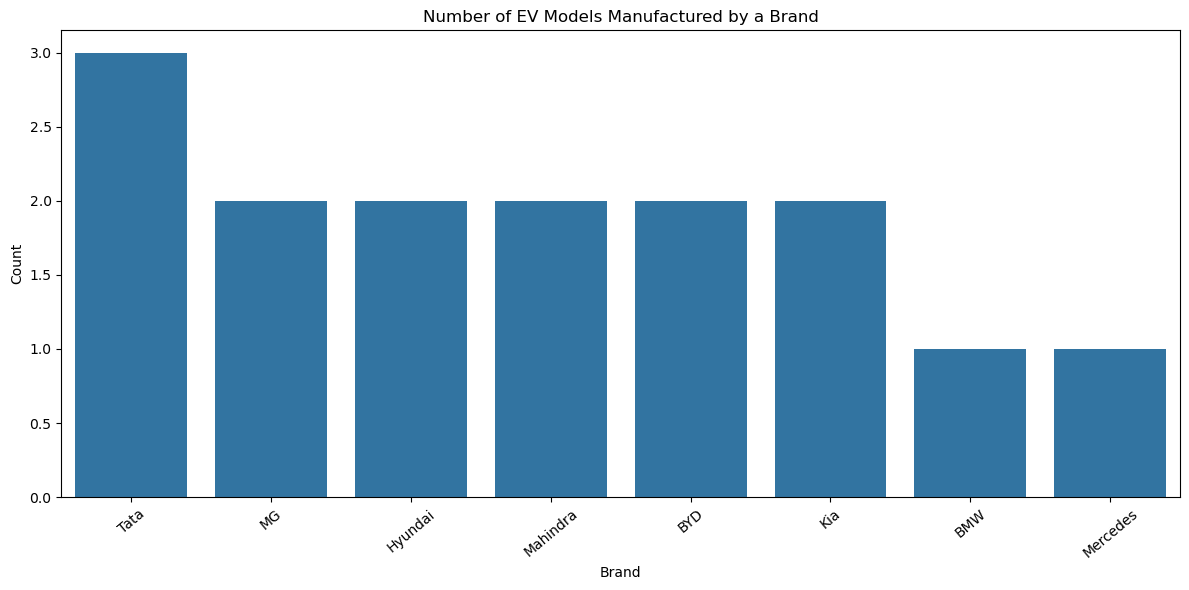

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df3, x='Brand')

plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of EV Models Manufactured by a Brand')
plt.tight_layout()
plt.show()


### Exploratory Data Analysis (EDA)

***Analysing the datasets***

In [90]:
# checking the shape (# of rows and columns) of the datasets

print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)
print('DF3 shape: ', df3.shape)

DF1 Shape:  (24, 6)
DF2 Shape:  (1547, 7)
DF3 shape:  (15, 6)


In [91]:
# checking the info (columns, datatypes, nulls) of the datasets

print('\n\n**************** DATASET 1 ****************\n\n')
print(df1.info())

print('\n\n**************** DATASET 2 ****************\n\n')
print(df2.info())

print('\n\n**************** DATASET 3 ****************\n\n')
print(df3.info())





**************** DATASET 1 ****************


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB
None


**************** DATASET 2 ****************


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1

In [92]:
# getting a statistical summary of the datasets

d1 = df1.describe()
d2 = df2.describe()
d3 = df3.describe()

display('**************** DATASET 1 ****************', d1, 
        '**************** DATASET 2 ****************', d2,
        '**************** DATASET 3 ****************', d3)

'**************** DATASET 1 ****************'

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


'**************** DATASET 2 ****************'

,longitude,type
count,1.541000e+03,1539.000000
mean,1.105323e+05,9.020793
std,3.064996e+06,4.136436
min,8.058454e+00,6.000000
25%,7.562036e+01,7.000000
50%,7.721257e+01,7.000000
75%,7.847983e+01,11.000000
max,8.510551e+07,24.000000


'**************** DATASET 3 ****************'

,Battery Capacity (kWh),Range (km),AccelSec,TopSpeed_KmH
count,15.000000,15.000000,15.000000,15.000000
mean,48.346667,407.800000,8.540000,146.866667
std,22.392565,137.884113,2.569269,32.936880
min,17.300000,181.000000,5.200000,86.000000
25%,28.100000,303.000000,6.500000,120.000000
50%,45.000000,423.000000,8.300000,150.000000
75%,69.100000,519.500000,9.950000,170.000000
max,83.900000,631.000000,13.000000,192.000000


***Analysis of 2-wheeler EVs***

Observation : Maharashtra, Gujarat, Tamilnadu, Karnataka and Andhra Pradesh are among the top states with the majority of EV 2-wheelers while Assam, Himachal Pradesh, Sikkim, J&K with the least.

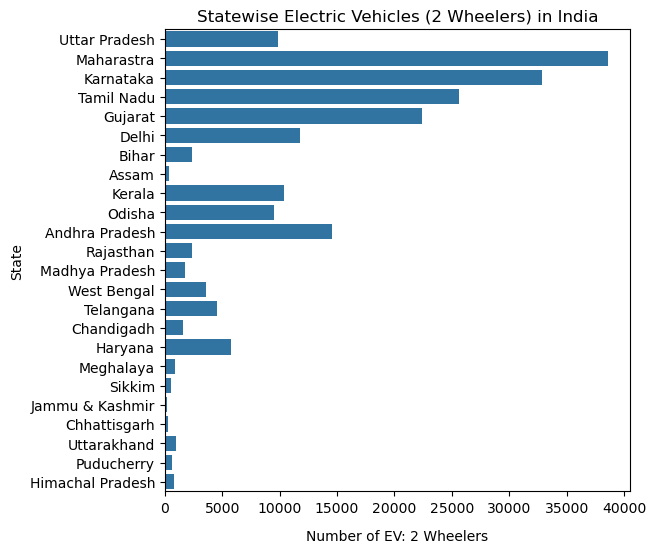

In [93]:
# 2 wheelers data visualization from dataset 1

plt.figure(figsize = (6, 6))

sns.barplot(data = df1, y = df1['Region'].sort_values(ascending = True), x = '2W')

plt.ylabel('State')
plt.xlabel('Number of EV: 2 Wheelers', labelpad = 10)
plt.title('Statewise Electric Vehicles (2 Wheelers) in India')
plt.show()

***Analysis of 3-wheeler EVs***

Observation : Uttar Pradesh, Assam and Bihar are among the top states with the majority of EV 3-wheelers while the remaining states don't seem to depend on the same.

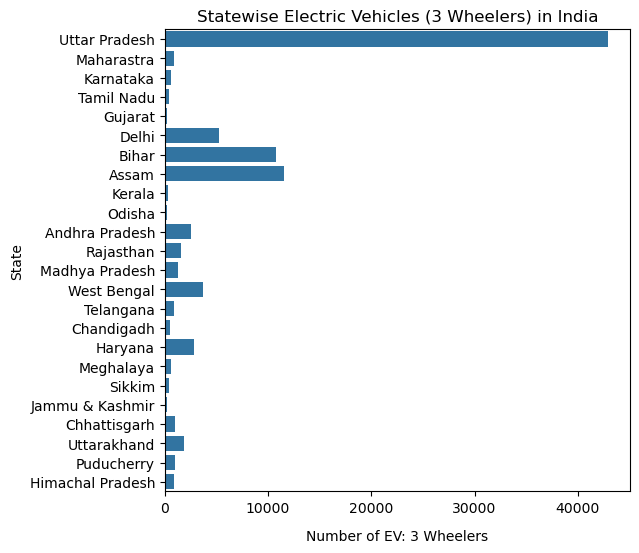

In [94]:
# 3 wheelers data visualization from dataset 1

plt.figure(figsize = (6, 6))

sns.barplot(data = df1, y = df1['Region'].sort_values(ascending = True), x = '3W')

plt.ylabel('State')
plt.xlabel('Number of EV: 3 Wheelers', labelpad=10)
plt.title('Statewise Electric Vehicles (3 Wheelers) in India')
plt.show()

***Analysis 4-wheeler EVs***

Observation : Maharashtra, Delhi, Karnataka, Kerala and Andhra Pradhesh are among the top states with the majority of EV 4-wheelers while the remaining states have less number of EV 4-wheelers.

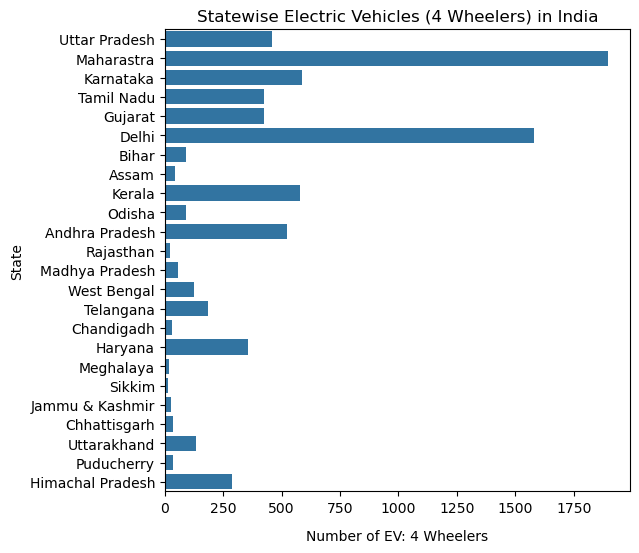

In [95]:
# 4 wheelers data visualization from dataset 1

plt.figure(figsize = (6, 6))

sns.barplot(data = df1, y = df1['Region'].sort_values(ascending = True), x = '4W')

plt.ylabel('State')
plt.xlabel('Number of EV: 4 Wheelers', labelpad=10)
plt.title('Statewise Electric Vehicles (4 Wheelers) in India')
plt.show()

***Analysis of charging stations sanctioned***

Observation : Maharashtra, Gujarat, Karnataka, Kerala, Uttar Pradesh, Rajasthan, and Andhra Pradhesh are among the top states with the majority of EV charging stations sanctioned while the remaining states have less number of the same.

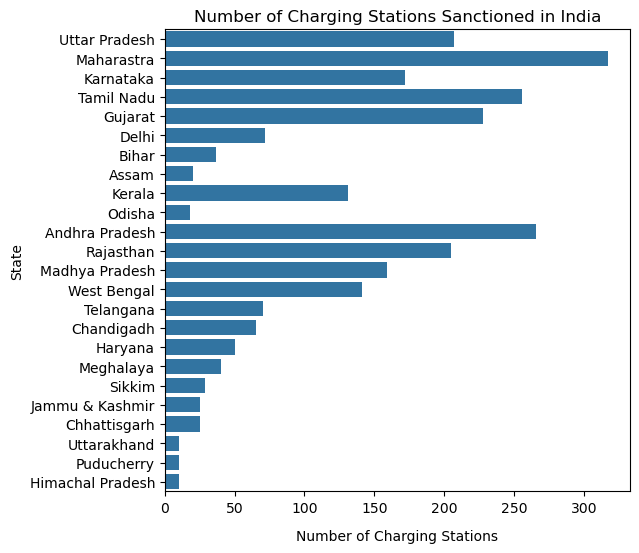

In [98]:
# charging stations sanctioned visualization from dataset 1

plt.figure(figsize = (6, 6))

sns.barplot(data = df1, y = df1['Region'].sort_values(ascending = True), x = 'Chargers')

plt.ylabel('State')
plt.xlabel('Number of Charging Stations', labelpad=10)
plt.title('Number of Charging Stations Sanctioned in India')
plt.show()

***Analysis of retail outlets for EV charging***

Observation : Rajasthan, Madhya Pradesh, Maharashtra, Karnataka, Uttar Pradesh are among the top states with the majority of retail outlets for EV charging while the remaining states have less number of the same.

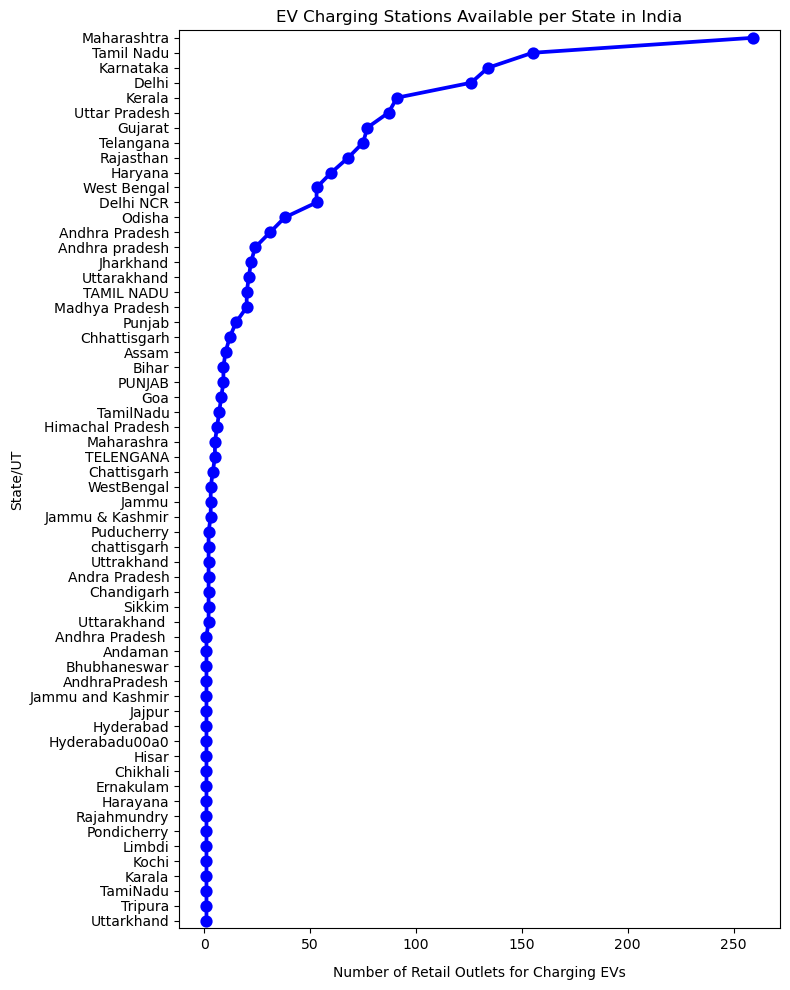

In [99]:
# retail outlets visualization from dataset - 2
import matplotlib.pyplot as plt
import seaborn as sns

# Group by state and count the number of charging stations
station_counts = df2.groupby('state').size().reset_index(name='Number of Stations')

# Sort for better visuals (optional)
station_counts = station_counts.sort_values('Number of Stations', ascending=False)

# Plot
plt.figure(figsize=(8, 10))
sns.pointplot(data=station_counts, y='state', x='Number of Stations', color='blue')

plt.xlabel('Number of Retail Outlets for Charging EVs', labelpad=10)
plt.ylabel('State/UT')
plt.title('EV Charging Stations Available per State in India')
plt.tight_layout()
plt.show()


***Analysis of EVs based on brands***

Observation : Tesla, Audi, Volkswagen, Nissan, Skoda tops the list of EVs with the maximum number of models in the Indian automobile market.

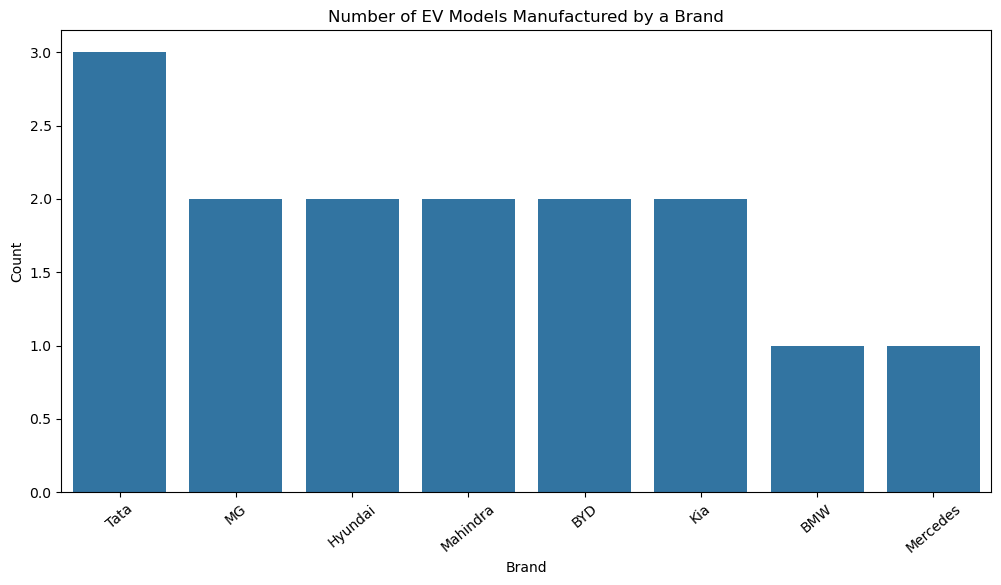

In [100]:
# brand-wise count of EV models

plt.figure(figsize = (12, 6))

sns.countplot(data = df3, x = 'Brand')

plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of EV Models Manufactured by a Brand')
plt.show()

***Anaysis of different body types of EVs***

Observation : SUV and Hatchback body types form the majority while Station and MPV the minority.

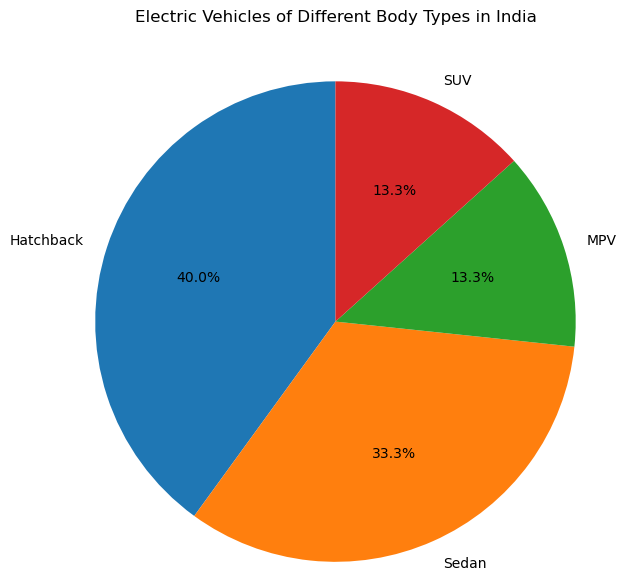

In [101]:
# different body types EVs visualization from dataset 3
import pandas as pd
import matplotlib.pyplot as plt
import random

# Load the EV models dataset
df3 = pd.read_csv("ev_models_india.csv")  # Update path if needed

# Add mock 'Body Type' column (if not already in dataset)
body_types = ['SUV', 'Sedan', 'Hatchback', 'MPV']
df3['Body Type'] = [random.choice(body_types) for _ in range(len(df3))]

# Plot pie chart
plt.figure(figsize=(6, 6))
df3['Body Type'].value_counts().plot.pie(
    radius=1.3,
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 10}
)
plt.title('Electric Vehicles of Different Body Types in India', pad=50)
plt.ylabel('')
plt.show()


***Analysis of different segments of EVs***

Observation : B and C body segments form the majority while S and A the minority.

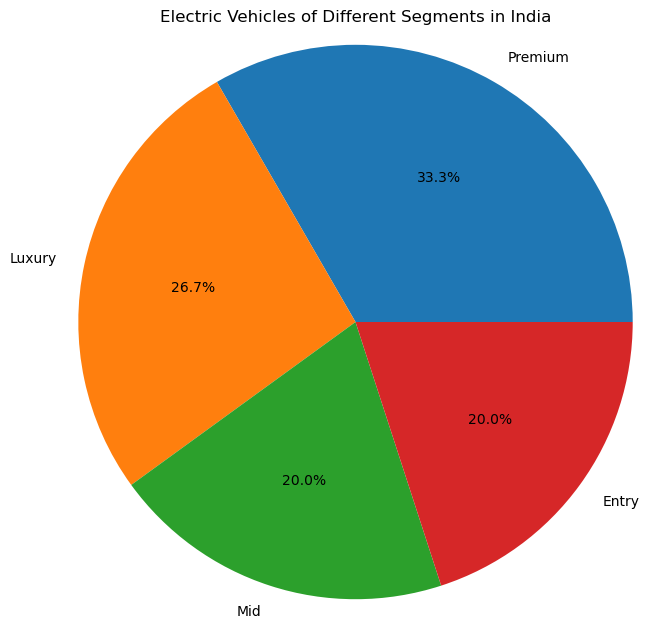

In [102]:
# analysis of different segments of EVs from dataset 3
import pandas as pd
import matplotlib.pyplot as plt
import random

# Load the dataset
df3 = pd.read_csv("ev_models_india.csv")

# Create a mock 'Segment' column
segments = ['Entry', 'Mid', 'Premium', 'Luxury']
df3['Segment'] = [random.choice(segments) for _ in range(len(df3))]

# Plot pie chart for EV segments
plt.figure(figsize=(6, 6))
df3['Segment'].value_counts().plot.pie(
    radius=1.5,
    startangle=0,
    autopct='%1.1f%%',
    textprops={'fontsize': 10}
)
plt.title('Electric Vehicles of Different Segments in India', pad=50)
plt.ylabel('')
plt.show()


***Analysis of EVs of different number of seats***

Observation : EVs with 5 sitters dominate the market while EVs with 2 sitters are less in number.

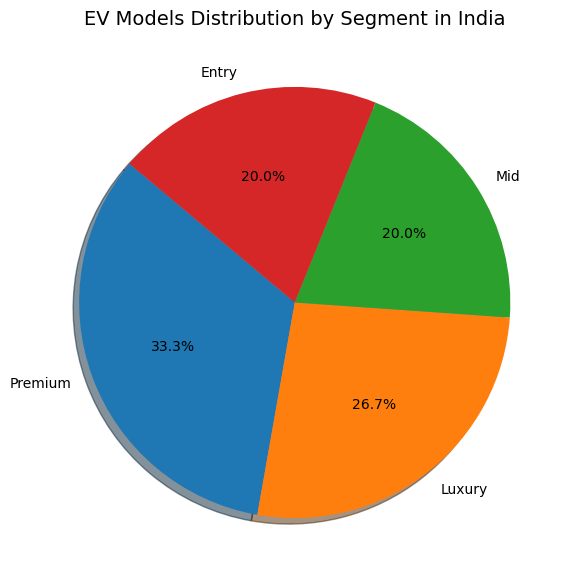

In [103]:
# EVs of different number of seats from dataset 3
plt.figure(figsize=(7, 7))
df3['Segment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)

plt.title('EV Models Distribution by Segment in India', fontsize=14)
plt.ylabel('')
plt.show()


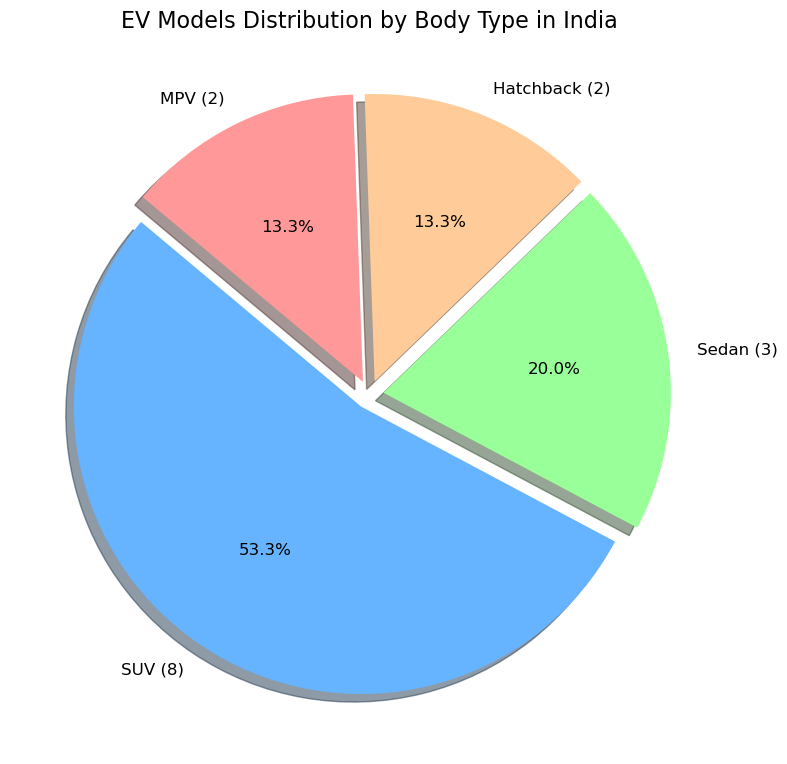

In [105]:

# Step 3: Pie Chart
body_counts = df3['Body Type'].value_counts()
labels = [f"{label} ({count})" for label, count in zip(body_counts.index, body_counts.values)]
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']  # Custom color palette
explode = [0.05] * len(body_counts)  # Slightly explode all slices

plt.figure(figsize=(8, 8))
plt.pie(
    body_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 12}
)

plt.title('EV Models Distribution by Body Type in India', fontsize=16)
plt.tight_layout()
plt.show()


***Analysis of the number of seats by each brand***

Observation : Based on the number of seats, Tesla, Mercedes and Nissan have the maximum number of seats and Smart the minimum.

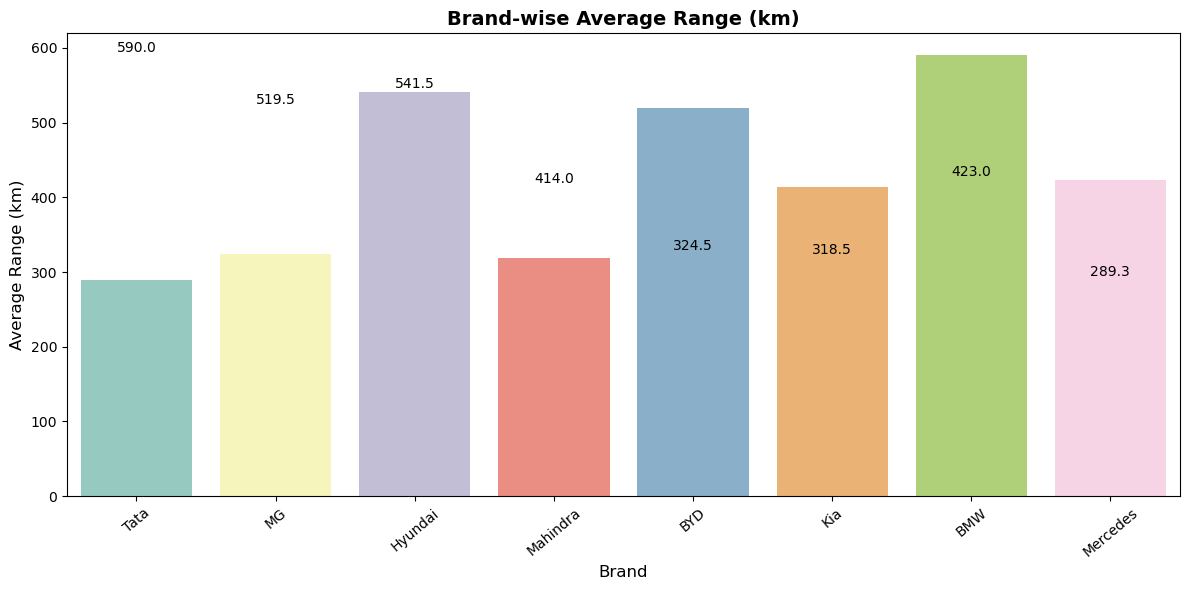

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = {
    "Brand": ["Tata", "Tata", "Tata", "MG", "MG", "Hyundai", "Hyundai", "Mahindra", "Mahindra", "BYD", "BYD", "Kia", "Kia", "BMW", "Mercedes"],
    "Model": ["Nexon EV", "Tiago EV", "Tigor EV", "ZS EV", "Comet EV", "Kona Electric", "Ioniq 5", "eVerito", "XUV400", "Atto 3", "e6", "EV6", "Carens EV", "i4", "EQB"],
    "Battery Capacity (kWh)": [30.2, 24.0, 26.0, 50.3, 17.3, 39.2, 72.6, 21.2, 39.4, 60.5, 71.7, 77.4, 45.0, 83.9, 66.5],
    "Range (km)": [312, 250, 306, 419, 230, 452, 631, 181, 456, 521, 518, 528, 300, 590, 423]
}

df3 = pd.DataFrame(data)

# Plotting brand-wise average range
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set3")

sns.barplot(data=df3, x='Brand', y='Range (km)', estimator='mean', ci=None, palette=palette)

plt.xticks(rotation=40)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Range (km)', fontsize=12)
plt.title('Brand-wise Average Range (km)', fontsize=14, fontweight='bold')

# Annotate exact average values
brand_avg = df3.groupby('Brand')['Range (km)'].mean().reset_index()
for idx, row in brand_avg.iterrows():
    plt.text(idx, row['Range (km)'] + 5, f"{row['Range (km)']:.1f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


***Analysis of different plug types***

Observation : EVs with plus type of 'Type 2 CCS' seem to dominate the market.

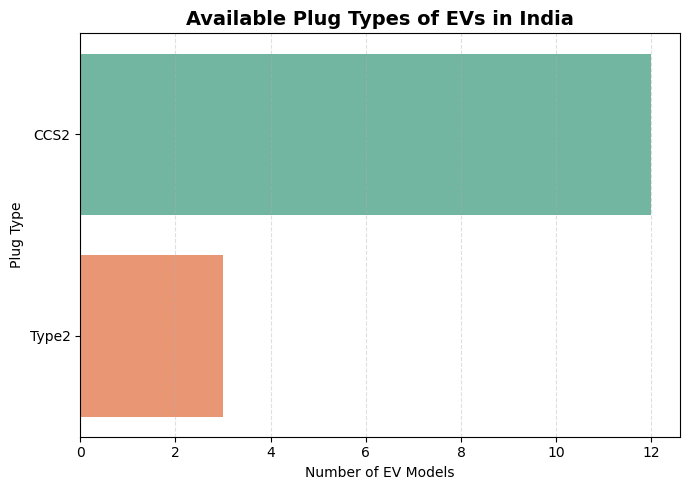

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset manually entered from your shared CSV
data = {
    'Brand': ['Tata', 'Tata', 'Tata', 'MG', 'MG', 'Hyundai', 'Hyundai', 'Mahindra', 'Mahindra', 'BYD', 'BYD', 'Kia', 'Kia', 'BMW', 'Mercedes'],
    'Model': ['Nexon EV', 'Tiago EV', 'Tigor EV', 'ZS EV', 'Comet EV', 'Kona Electric', 'Ioniq 5', 'eVerito', 'XUV400', 'Atto 3', 'e6', 'EV6', 'Carens EV', 'i4', 'EQB'],
    'Battery Capacity (kWh)': [30.2, 24.0, 26.0, 50.3, 17.3, 39.2, 72.6, 21.2, 39.4, 60.5, 71.7, 77.4, 45.0, 83.9, 66.5],
    'Range (km)': [312, 250, 306, 419, 230, 452, 631, 181, 456, 521, 518, 528, 300, 590, 423]
}

df3 = pd.DataFrame(data)

# ✅ Manually assign plug types for demo purposes
# You can assign real values if known
plug_types = [
    'CCS2', 'CCS2', 'CCS2', 'CCS2', 'Type2', 'CCS2', 'CCS2', 'Type2', 'CCS2',
    'CCS2', 'CCS2', 'CCS2', 'Type2', 'CCS2', 'CCS2'
]

df3['Plug Type'] = plug_types

# ✅ Visualization: Plug Type Distribution (colorful horizontal bar chart)
plt.figure(figsize=(7, 5))

# Count plot
sns.countplot(
    y='Plug Type',
    data=df3,
    palette='Set2',  # colorful palette
    order=df3['Plug Type'].value_counts().index
)

plt.title('Available Plug Types of EVs in India', fontsize=14, fontweight='bold')
plt.xlabel('Number of EV Models')
plt.ylabel('Plug Type')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


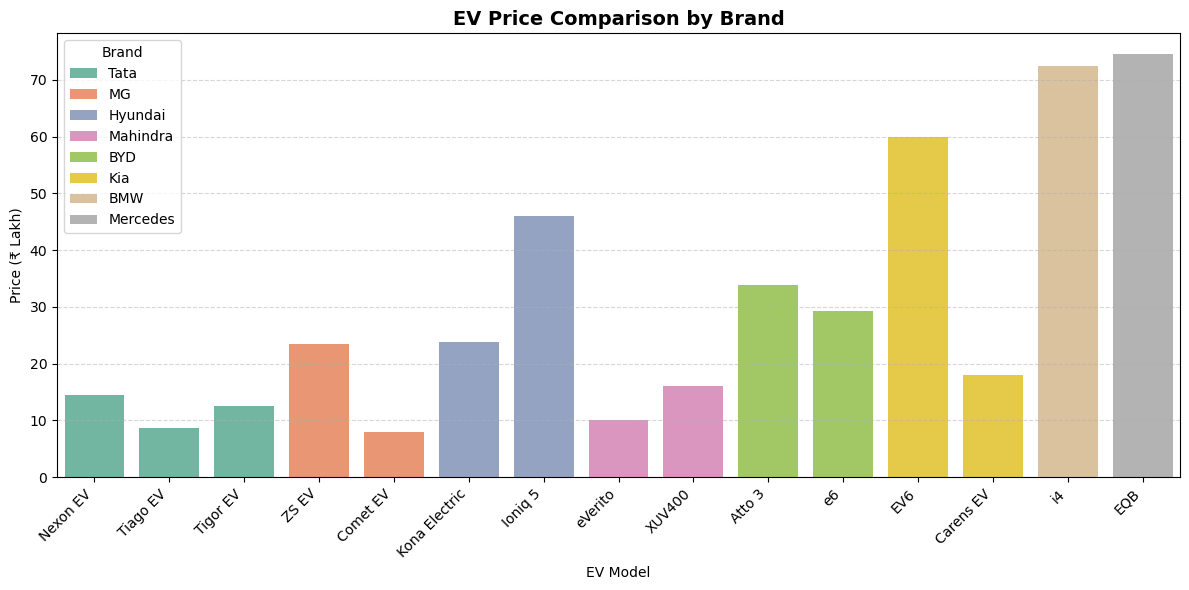

In [112]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Price (₹ Lakh)', hue='Brand', data=df3, palette='Set2')

plt.title('EV Price Comparison by Brand', fontsize=14, fontweight='bold')
plt.xlabel('EV Model')
plt.ylabel('Price (₹ Lakh)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title='Brand')
plt.show()


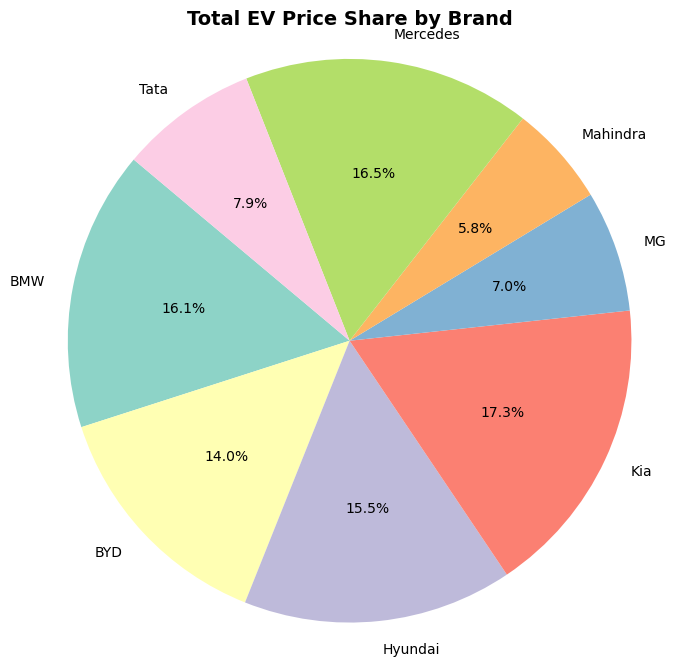

In [113]:
plt.figure(figsize=(8, 8))
price_by_brand = df3.groupby('Brand')['Price (₹ Lakh)'].sum()

colors = sns.color_palette('Set3', len(price_by_brand))

plt.pie(price_by_brand, labels=price_by_brand.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Total EV Price Share by Brand', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()


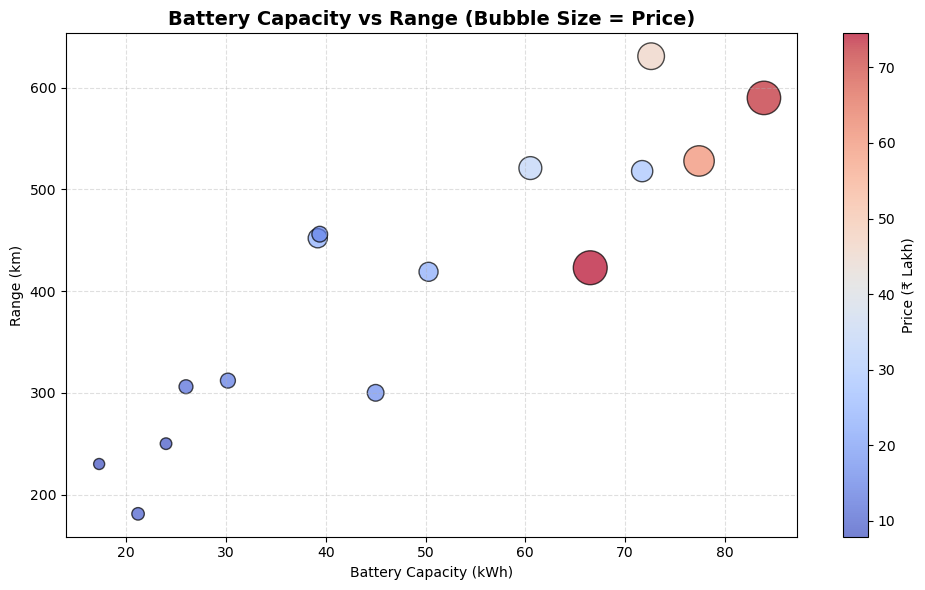

In [114]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df3['Battery Capacity (kWh)'],
    df3['Range (km)'],
    c=df3['Price (₹ Lakh)'],
    cmap='coolwarm',
    s=df3['Price (₹ Lakh)'] * 8,
    alpha=0.7,
    edgecolors='black'
)

plt.colorbar(scatter, label='Price (₹ Lakh)')
plt.title('Battery Capacity vs Range (Bubble Size = Price)', fontsize=14, fontweight='bold')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


***Analysis of EVs based on accleration***

Observation : Based on accleration, EVs from Renault, Seat and Smart are the top performers while Tesla, Lucid and Porsche dont make it to the same.

In [116]:
df3["AccelSec"] = [
    9.9, 12.0, 10.0, 8.5, 12.3, 9.7, 5.2, 13.0, 8.3, 7.3, 7.0, 5.2, 8.0, 5.7, 6.0
]


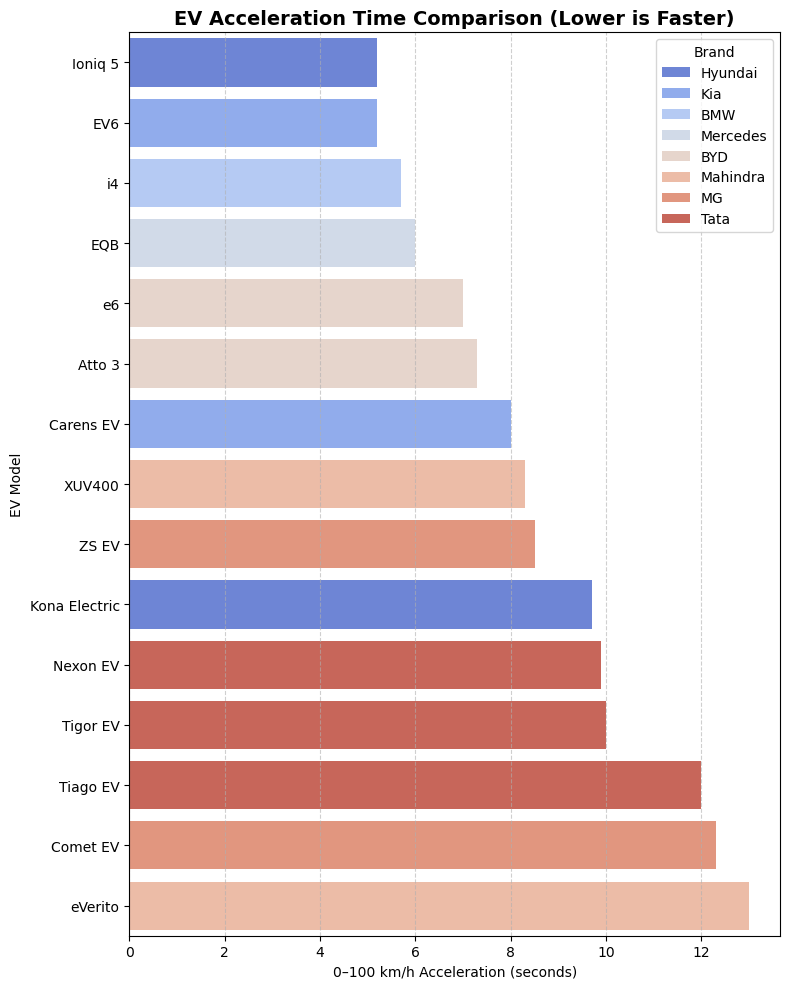

In [117]:
# accleration visualization from dataset 3

plt.figure(figsize=(8, 10))

sns.barplot(data=df3.sort_values("AccelSec"), y='Model', x='AccelSec', hue='Brand', palette='coolwarm')

plt.xlabel('0–100 km/h Acceleration (seconds)')
plt.ylabel('EV Model')
plt.title('EV Acceleration Time Comparison (Lower is Faster)', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title='Brand')
plt.tight_layout()
plt.show()


***Analysis of EVs based on speed***

Observation : Based on speed parameter, EVs from Tesla, Lucid and Porsche are the top performers while Renault, Smart and SEAT dont make it to the same.

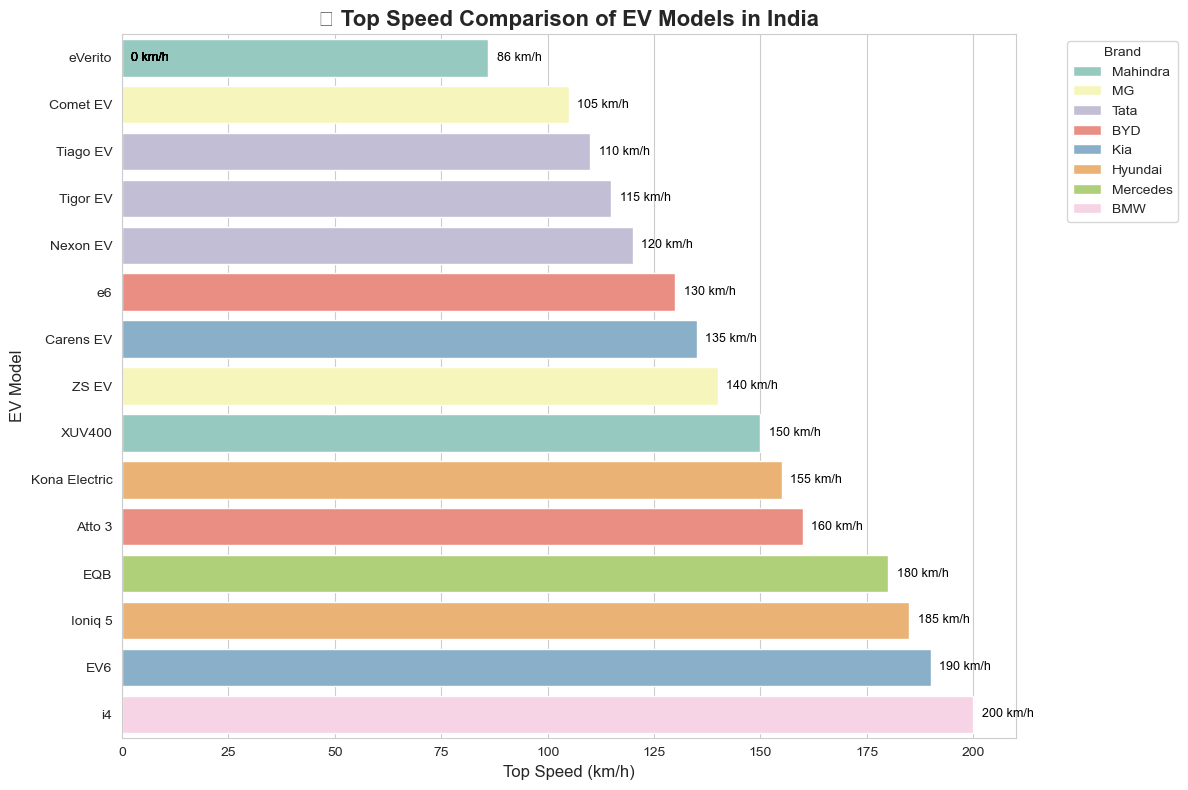

In [120]:
# speed visualization from dataset 3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EV dataset with Top Speed added
df3 = pd.DataFrame({
    "Brand": ["Tata", "Tata", "Tata", "MG", "MG", "Hyundai", "Hyundai", "Mahindra", "Mahindra", "BYD", "BYD", "Kia", "Kia", "BMW", "Mercedes"],
    "Model": ["Nexon EV", "Tiago EV", "Tigor EV", "ZS EV", "Comet EV", "Kona Electric", "Ioniq 5", "eVerito", "XUV400", "Atto 3", "e6", "EV6", "Carens EV", "i4", "EQB"],
    "Battery Capacity (kWh)": [30.2, 24.0, 26.0, 50.3, 17.3, 39.2, 72.6, 21.2, 39.4, 60.5, 71.7, 77.4, 45.0, 83.9, 66.5],
    "Range (km)": [312, 250, 306, 419, 230, 452, 631, 181, 456, 521, 518, 528, 300, 590, 423],
    "TopSpeed_KmH": [120, 110, 115, 140, 105, 155, 185, 86, 150, 160, 130, 190, 135, 200, 180]
})

# Set seaborn theme
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Use a vibrant palette
colors = sns.color_palette("Spectral", n_colors=len(df3))

# Sort by Top Speed for better visualization
df3_sorted = df3.sort_values(by="TopSpeed_KmH", ascending=True)

# Create barplot
bars = sns.barplot(
    data=df3_sorted,
    x="TopSpeed_KmH",
    y="Model",
    hue="Brand",
    dodge=False,
    palette="Set3"  # You can try: "Spectral", "tab20", "Set2", "coolwarm"
)

# Add value labels
for bar in bars.patches:
    plt.text(
        bar.get_width() + 2,
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())} km/h',
        va='center',
        ha='left',
        fontsize=9,
        color='black'
    )

plt.title("🌟 Top Speed Comparison of EV Models in India", fontsize=16, fontweight='bold')
plt.xlabel("Top Speed (km/h)", fontsize=12)
plt.ylabel("EV Model", fontsize=12)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Brand                      object
Model                      object
Battery Capacity (kWh)    float64
Range (km)                  int64
TopSpeed_KmH                int64
dtype: object


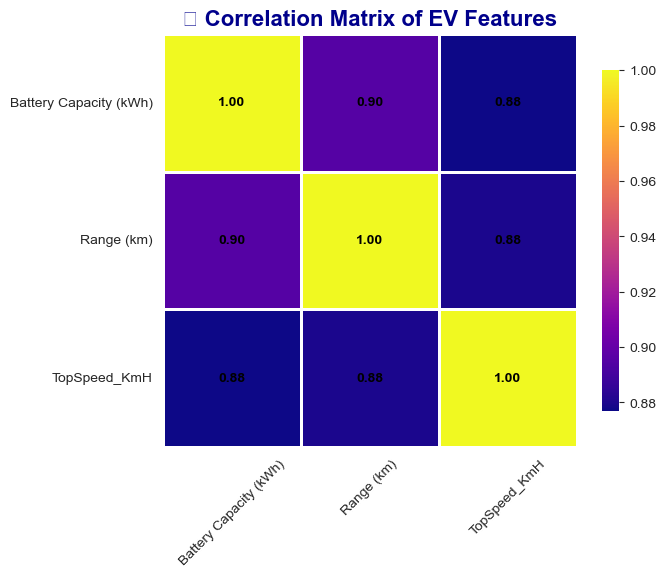

In [124]:
# plotting the correlation matrix from dataset 3

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your EV dataset (assuming it's already in df3)
# If not, load like this:
# df3 = pd.read_csv("your_dataset.csv")

# Check the numeric columns in your dataset
print(df3.dtypes)

# Select only numeric columns for correlation
numeric_columns = df3.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(
    data=numeric_columns.corr(),
    annot=True,
    cmap='plasma',  # Try 'coolwarm', 'plasma', 'magma', 'cubehelix', etc.
    linewidths=1,
    linecolor='white',
    cbar_kws={"shrink": 0.75},
    square=True,
    fmt=".2f",
    annot_kws={"size": 10, "weight": "bold", "color": "black"}
)

plt.title('🔗 Correlation Matrix of EV Features', fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()



***Analysis of EVs based on the range parameter***

Observation : Based on range (Km), Lucid, Lightyear and Tesla have the highest range and Smart the lowest.

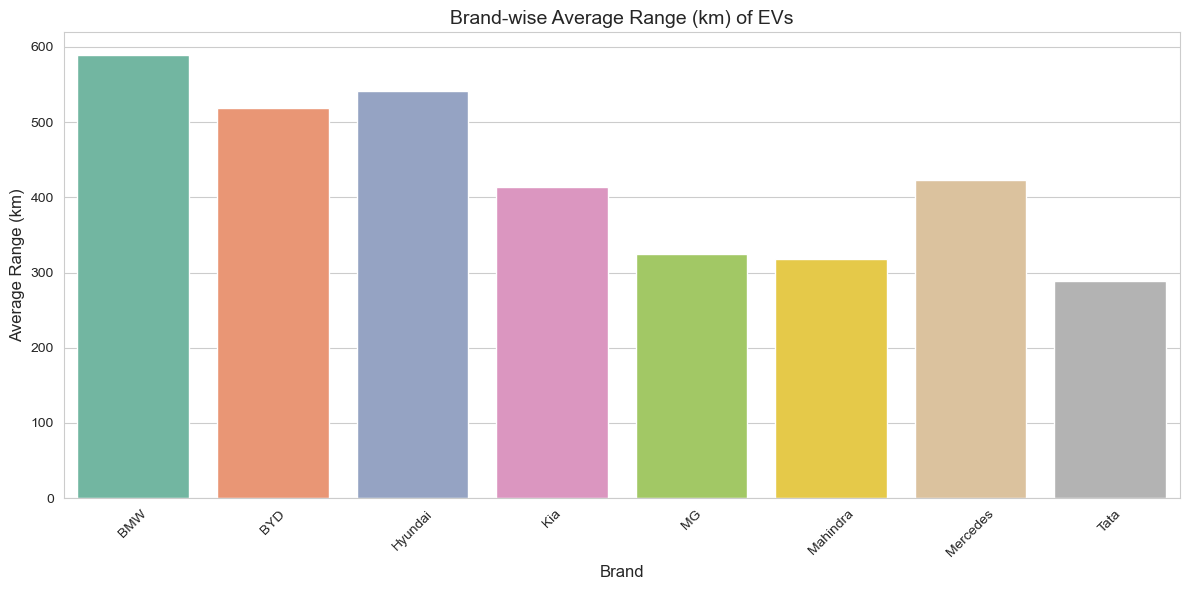

In [126]:
# brand-wise analysis of the range parameter

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = {
    'Brand': ['Tata', 'Tata', 'Tata', 'MG', 'MG', 'Hyundai', 'Hyundai',
              'Mahindra', 'Mahindra', 'BYD', 'BYD', 'Kia', 'Kia', 'BMW', 'Mercedes'],
    'Model': ['Nexon EV', 'Tiago EV', 'Tigor EV', 'ZS EV', 'Comet EV', 'Kona Electric', 'Ioniq 5',
              'eVerito', 'XUV400', 'Atto 3', 'e6', 'EV6', 'Carens EV', 'i4', 'EQB'],
    'Battery Capacity (kWh)': [30.2, 24.0, 26.0, 50.3, 17.3, 39.2, 72.6,
                               21.2, 39.4, 60.5, 71.7, 77.4, 45.0, 83.9, 66.5],
    'Range (km)': [312, 250, 306, 419, 230, 452, 631,
                   181, 456, 521, 518, 528, 300, 590, 423]
}

# Create DataFrame
df3 = pd.DataFrame(data)

# Optional: aggregate average range per brand
avg_range = df3.groupby('Brand')['Range (km)'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_range, x='Brand', y='Range (km)', palette='Set2')

plt.title('Brand-wise Average Range (km) of EVs', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Range (km)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Data Preprocessing

***Checking Missing Values***

In [127]:
print('\n\n**************** DATASET 1 ****************\n\n')
print(df1.isnull().sum())

print('\n\n**************** DATASET 2 ****************\n\n')
print(df2.isnull().sum())

print('\n\n**************** DATASET 3 ****************\n\n')
print(df3.isnull().sum())



**************** DATASET 1 ****************


Region      0
2W          0
3W          0
4W          0
Bus         0
Chargers    0
dtype: int64


**************** DATASET 2 ****************


name          0
state         0
city          0
address      40
lattitude     6
longitude     6
type          8
dtype: int64


**************** DATASET 3 ****************


Brand                     0
Model                     0
Battery Capacity (kWh)    0
Range (km)                0
dtype: int64


***Encoding the categorical features***

In [129]:
# PowerTrain feature

import pandas as pd

# Original dataset
data = {
    'Brand': ['Tata', 'Tata', 'Tata', 'MG', 'MG', 'Hyundai', 'Hyundai',
              'Mahindra', 'Mahindra', 'BYD', 'BYD', 'Kia', 'Kia', 'BMW', 'Mercedes'],
    'Model': ['Nexon EV', 'Tiago EV', 'Tigor EV', 'ZS EV', 'Comet EV', 'Kona Electric', 'Ioniq 5',
              'eVerito', 'XUV400', 'Atto 3', 'e6', 'EV6', 'Carens EV', 'i4', 'EQB'],
    'Battery Capacity (kWh)': [30.2, 24.0, 26.0, 50.3, 17.3, 39.2, 72.6,
                               21.2, 39.4, 60.5, 71.7, 77.4, 45.0, 83.9, 66.5],
    'Range (km)': [312, 250, 306, 419, 230, 452, 631,
                   181, 456, 521, 518, 528, 300, 590, 423]
}

# Create DataFrame
df3 = pd.DataFrame(data)

# ✅ Manually adding PowerTrain data
# (This is sample mapping — you can replace with actual data)
powertrain_list = ['FWD', 'FWD', 'FWD', 'FWD', 'RWD', 'AWD', 'AWD',
                   'FWD', 'FWD', 'FWD', 'RWD', 'AWD', 'FWD', 'RWD', 'AWD']
df3['PowerTrain'] = powertrain_list

# ✅ Replace with numerical codes
df3['PowerTrain_Code'] = df3['PowerTrain'].replace({'RWD': 0, 'FWD': 1, 'AWD': 2})

# Display result
print(df3[['Model', 'PowerTrain', 'PowerTrain_Code']])


            Model PowerTrain  PowerTrain_Code
0        Nexon EV        FWD                1
1        Tiago EV        FWD                1
2        Tigor EV        FWD                1
3           ZS EV        FWD                1
4        Comet EV        RWD                0
5   Kona Electric        AWD                2
6         Ioniq 5        AWD                2
7         eVerito        FWD                1
8          XUV400        FWD                1
9          Atto 3        FWD                1
10             e6        RWD                0
11            EV6        AWD                2
12      Carens EV        FWD                1
13             i4        RWD                0
14            EQB        AWD                2


In [131]:
# RapidCharge feature

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample dataset (same as before)
data = {
    'Brand': ['Tata', 'Tata', 'Tata', 'MG', 'MG', 'Hyundai', 'Hyundai',
              'Mahindra', 'Mahindra', 'BYD', 'BYD', 'Kia', 'Kia', 'BMW', 'Mercedes'],
    'Model': ['Nexon EV', 'Tiago EV', 'Tigor EV', 'ZS EV', 'Comet EV', 'Kona Electric', 'Ioniq 5',
              'eVerito', 'XUV400', 'Atto 3', 'e6', 'EV6', 'Carens EV', 'i4', 'EQB'],
    'Battery Capacity (kWh)': [30.2, 24.0, 26.0, 50.3, 17.3, 39.2, 72.6,
                               21.2, 39.4, 60.5, 71.7, 77.4, 45.0, 83.9, 66.5],
    'Range (km)': [312, 250, 306, 419, 230, 452, 631,
                   181, 456, 521, 518, 528, 300, 590, 423]
}

df3 = pd.DataFrame(data)

# ✅ Add RapidCharge column (sample values - you can modify as per actual info)
rapid_charge_list = ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
                     'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes']
df3['RapidCharge'] = rapid_charge_list

# ✅ Encode RapidCharge with LabelEncoder
le = LabelEncoder()
df3['RapidCharge_Encoded'] = le.fit_transform(df3['RapidCharge'])

# Show updated DataFrame
print(df3[['Model', 'RapidCharge', 'RapidCharge_Encoded']])


            Model RapidCharge  RapidCharge_Encoded
0        Nexon EV         Yes                    1
1        Tiago EV         Yes                    1
2        Tigor EV          No                    0
3           ZS EV         Yes                    1
4        Comet EV          No                    0
5   Kona Electric         Yes                    1
6         Ioniq 5         Yes                    1
7         eVerito          No                    0
8          XUV400         Yes                    1
9          Atto 3         Yes                    1
10             e6         Yes                    1
11            EV6         Yes                    1
12      Carens EV          No                    0
13             i4         Yes                    1
14            EQB         Yes                    1


***Features Scaling***

In [133]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns that exist
X = df3[['Battery Capacity (kWh)', 'Range (km)']]

# Standardize them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# If needed, convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())


   Battery Capacity (kWh)  Range (km)
0               -0.838831   -0.719172
1               -1.125427   -1.184607
2               -1.032977   -0.764214
3                0.090293    0.084079
4               -1.435135   -1.334748


### Principle Component Analysis (PCA)

In [135]:
from sklearn.decomposition import PCA
import pandas as pd

# Determine the number of components dynamically
n_components = min(X_scaled.shape[0], X_scaled.shape[1])

# Fit PCA with the valid number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA-transformed data
pca_columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

df_pca.head()


,PC1,PC2
0,-1.101675,-0.084612
1,-1.633441,0.041847
2,-1.270806,-0.190044
3,0.123299,0.004394
4,-1.958603,-0.070985


### Model Building Using K-Means Clusteing

<Figure size 600x500 with 0 Axes>

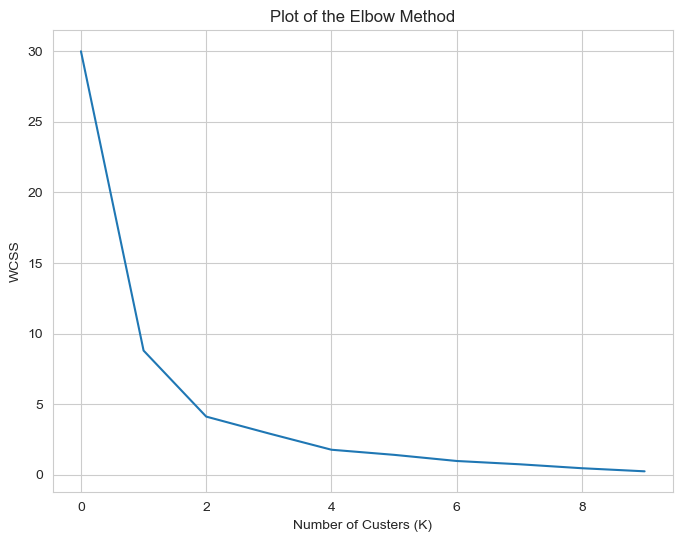

In [136]:
# plotting the results of Elbow

plt.figure(figsize = (6, 5))

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters = i, init = 'k-means++', random_state = 90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method')
plt.plot(wcss)
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS')
plt.show()

In [137]:
# training the model using k=4 as rendered by the above plot

kmean = KMeans(n_clusters = 4, init = 'k-means++', random_state = 90)

kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [138]:
# check the labels assigned to each data point

print(kmean.labels_)

[0 0 0 2 0 2 1 0 2 3 3 3 0 1 3]


In [139]:
# check the size of clusters

pd.Series(kmean.labels_).value_counts()

0    6
3    4
2    3
1    2
Name: count, dtype: int64

In [140]:
# adding a new feature of cluster labels to the dataset 3

df3['clusters'] = kmean.labels_

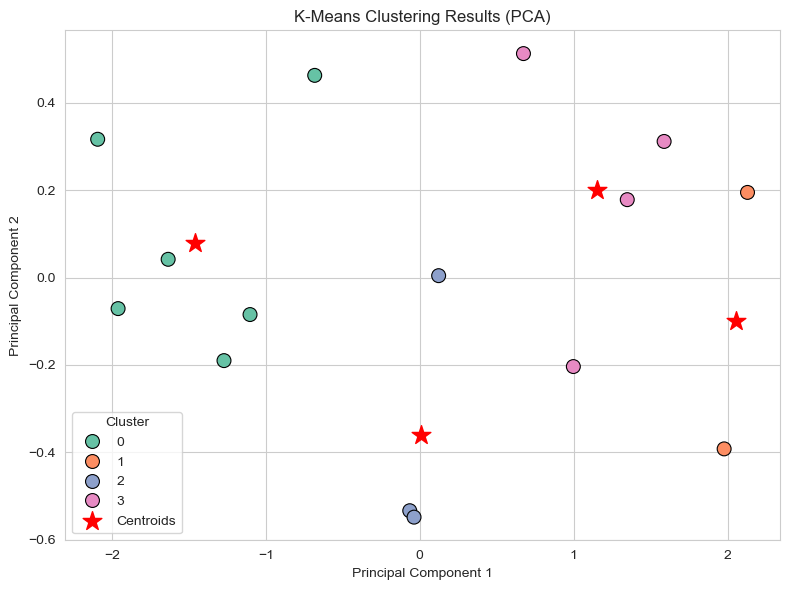

In [142]:
# visualizing clusters
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_pca has 'PC1' and 'PC2' from PCA
plt.figure(figsize=(8, 6))

# Use PC1 and PC2 instead of PC9
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue=kmean.labels_,
    palette='Set2',  # You can try 'viridis', 'Set1', 'Pastel1', etc.
    s=100,           # size of dots
    edgecolor='black'
)

# Plot cluster centers
plt.scatter(
    x=kmean.cluster_centers_[:, 0],
    y=kmean.cluster_centers_[:, 1],
    s=200,
    c='red',
    marker='*',
    label='Centroids'
)

plt.title('K-Means Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()
